# Exploration

In [1]:
from imports import *
from prepare import prep_data, basic_clean, lemmatize, remove_stopwords, split

In [2]:
# Getting data
df = pd.read_csv('data_science.csv')

In [3]:
# Initial cleaning
df = prep_data(df)

In [4]:
def clean(text):
    return remove_stopwords(lemmatize(basic_clean(text)), extra_words = ['experience', 'ability', 'skill'])

In [5]:
def clean_skills(text):
    return remove_stopwords(lemmatize(basic_clean(text)), extra_words = ['year', 'experience', 'ability', 'skill', 'programming', 'language'])

In [6]:
df.requirements = df.requirements.apply(clean)
df.skills = df.skills.apply(clean_skills)
train, validate, test = split(df)
train.shape, validate.shape, test.shape

((135, 22), (59, 22), (49, 22))

In [7]:
df.requirements

0      bachelor degree minimum year 4 year demonstrates thorough andor proven record success ...
1      identify execute predictive model help internal team masterworks understand artist mar...
2      selfmotivated highly disciplined passionate discovering right therapeutic right patien...
3      2 year python java objectoriented programming language handson understanding objectori...
4      2 year work quantitative analysis tackle business problem strong analytical including ...
                                                 ...                                            
238    lead development design data reporting asset power decisionmaking across hr division p...
239    bachelor degree computer science related field equivalent related professional buildin...
240    bachelor degree highly quantitative field computer science operational research statis...
241    bachelor degree required computer science mi engineering preferred 5 year programming ...
242    bachelor's degree compu

## Target Variable Univariate Analysis `label`

### Train Label Percentages

In [8]:
labels = pd.concat([train.label.value_counts(),
                    train.label.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
g,119,0.881481
u,16,0.118519


In [9]:
train.head()

,company,location,mode,type,level,role,requirements,edu_bachelor,edu_master,edu_phd,...,associate,entry,mid_senior,analyst,engineer,manager,scientist,edu_graduates,edu_u_dmnt,label
111,Dice,"Chicago, IL",On-site,Contract,Entry,Data Engineer,bachelor's degree quantitative discipline eg statistic computer science math physic en...,14,79,7,...,0,1,0,0,1,0,0,86,False,g
106,Wipro,United States,Remote,Contract,Associate,Data Scientist,software architecture system design development extensive development python programmi...,41,36,21,...,1,0,0,0,0,0,1,57,False,g
113,Gates Corporation,"Denver, CO",On-site,Full time,Entry,Data Analyst,undergraduate degree business analyticscomputer sciencebusiness administrationsystem a...,0,82,9,...,0,1,0,1,0,0,0,91,False,g
83,Regence BlueCross BlueShield of Utah,"Salt Lake City, UT",Remote,Full time,Entry,Data Scientist,passion helping healthy people stay well improving comfort health level sick people ef...,28,50,16,...,0,1,0,0,0,0,1,66,False,g
164,Eliassen Group,"Charlotte, NC",Remote,Full time,Mid-Senior,Data Analyst,four year degree one following statistic mathematics physic engineering computer scien...,30,35,19,...,0,0,1,1,0,0,0,54,False,g


In [10]:
train.columns

Index(['company', 'location', 'mode', 'type', 'level', 'role', 'requirements',
       'edu_bachelor', 'edu_master', 'edu_phd', 'edu_other', 'skills',
       'associate', 'entry', 'mid_senior', 'analyst', 'engineer', 'manager',
       'scientist', 'edu_graduates', 'edu_u_dmnt', 'label'],
      dtype='object')

### Overall Education Distribution

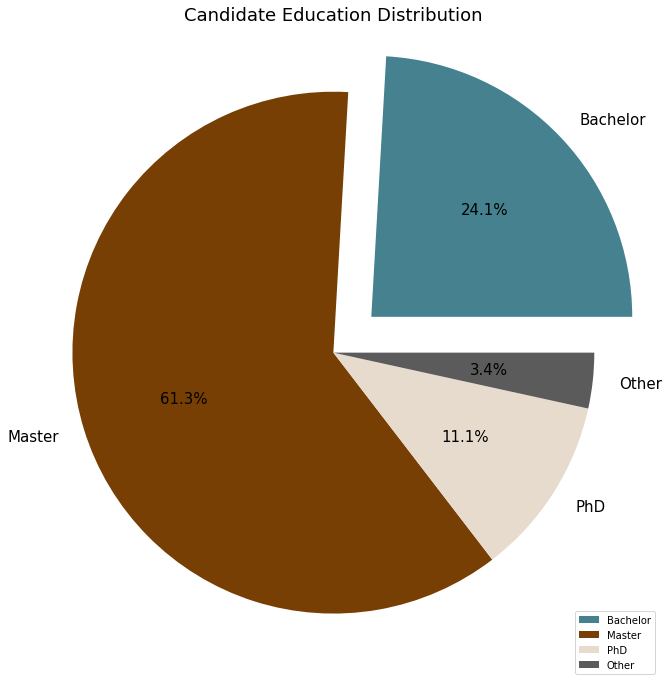

In [11]:
y = [train.edu_bachelor.sum(),train.edu_master.sum(), train.edu_phd.sum(), train.edu_other.sum()]
plt.figure(figsize=(16,12))
mylabels = ["Bachelor", "Master", 'PhD', 'Other']
myexplode = [0.2, 0, 0, 0]
mycolors = ['#45818e', '#783f04', '#e7dbcd', '#5b5b5b' ]
textprops = {"fontsize":15}
plt.pie(y, labels = mylabels, explode = myexplode, colors = mycolors, textprops=textprops, autopct='%.1f%%')
plt.legend()
plt.title('Candidate Education Distribution',fontsize=18)
plt.show() 

***

## Roles vs. Degree

In [12]:
train.role.value_counts()

Data Scientist          45
Data Engineer           38
Data Analyst            35
Data Science Manager    17
Name: role, dtype: int64

<AxesSubplot:xlabel='role', ylabel='count'>

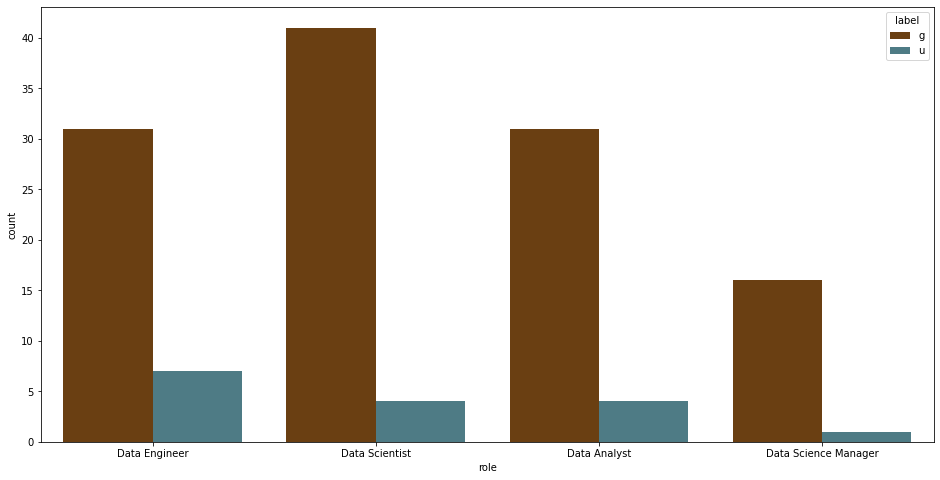

In [13]:
plt.figure(figsize = (16,8))
sns.countplot(x='role', hue='label', data=train, palette= ['#783f04','#45818e'])

#### Data Engineer

Text(0.5, 1.0, 'Data Engineer Education Distribution')

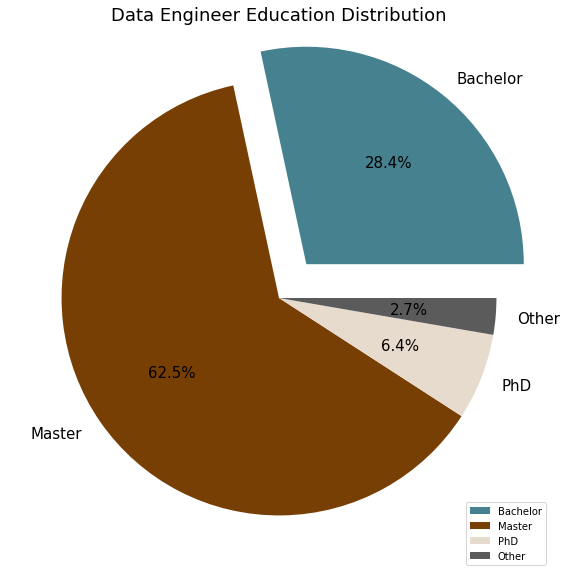

In [14]:
# Data Engineer
y = [train[train.engineer ==1].edu_bachelor.sum(),train[train.engineer ==1].edu_master.sum(), train[train.engineer ==1].edu_phd.sum(), train[train.engineer ==1].edu_other.sum()]
plt.figure(figsize=(10,10))
mylabels = ["Bachelor", "Master", 'PhD', 'Other']
myexplode = [0.2, 0, 0, 0]
mycolors = ['#45818e', '#783f04', '#e7dbcd', '#5b5b5b' ]
textprops = {"fontsize":15}
plt.pie(y, labels = mylabels, explode = myexplode, colors = mycolors, textprops=textprops, autopct='%.1f%%')
plt.legend()
plt.title('Data Engineer Education Distribution',fontsize=18)

#### Data Analyst

Text(0.5, 1.0, 'Data Analyst Education Distribution')

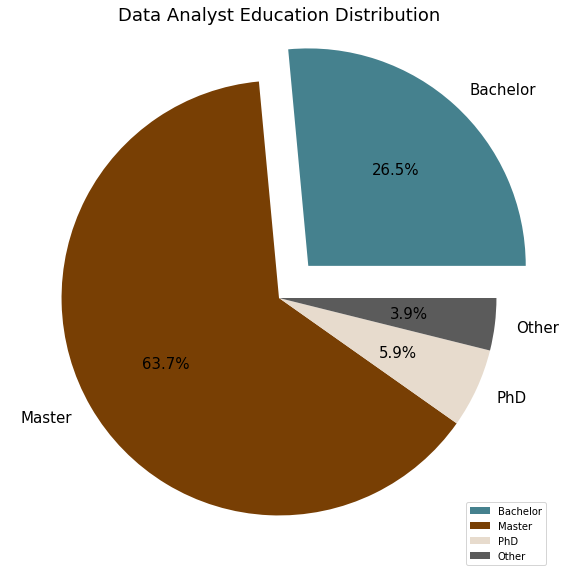

In [15]:
# Data Analyst
y = [train[train.analyst ==1].edu_bachelor.sum(),train[train.analyst ==1].edu_master.sum(), train[train.analyst ==1].edu_phd.sum(), train[train.analyst ==1].edu_other.sum()]
plt.figure(figsize=(10,10))
mylabels = ["Bachelor", "Master", 'PhD', 'Other']
myexplode = [0.2, 0, 0, 0]
mycolors = ['#45818e', '#783f04', '#e7dbcd', '#5b5b5b' ]
textprops = {"fontsize":15}
plt.pie(y, labels = mylabels, explode = myexplode, colors = mycolors, textprops=textprops, autopct='%.1f%%')
plt.legend()
plt.title('Data Analyst Education Distribution',fontsize=18)

#### Data Scientist

Text(0.5, 1.0, 'Data Scientist Education Distribution')

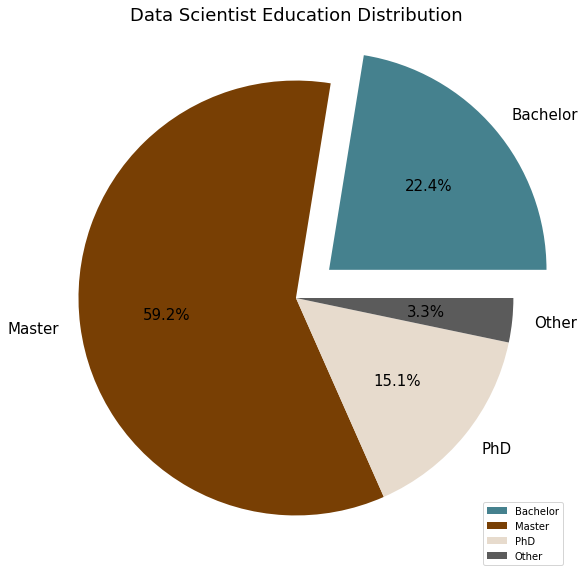

In [16]:
# Data Scientist
y = [train[train.scientist==1].edu_bachelor.sum(),train[train.scientist==1].edu_master.sum(), train[train.scientist==1].edu_phd.sum(), train[train.scientist==1].edu_other.sum()]
plt.figure(figsize=(10,10))
mylabels = ["Bachelor", "Master", 'PhD', 'Other']
myexplode = [0.2, 0, 0, 0]
mycolors = ['#45818e', '#783f04', '#e7dbcd', '#5b5b5b' ]
textprops = {"fontsize":15}
plt.pie(y, labels = mylabels, explode = myexplode, colors = mycolors, textprops=textprops, autopct='%.1f%%')
plt.legend()
plt.title('Data Scientist Education Distribution',fontsize=18)

#### Managerial

Text(0.5, 1.0, 'Data Science Managerial Roles Education Distribution')

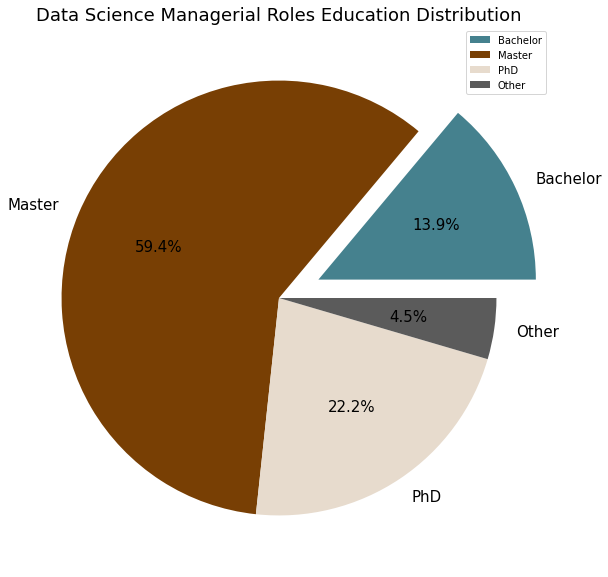

In [17]:
# Manager
y = [train[train.manager ==1].edu_bachelor.sum(),train[train.manager ==1].edu_master.sum(), train[train.manager==1].edu_phd.sum(), train[train.manager==1].edu_other.sum()]
plt.figure(figsize=(10,10))
mylabels = ["Bachelor", "Master", 'PhD', 'Other']
myexplode = [0.2, 0, 0, 0]
mycolors = ['#45818e', '#783f04', '#e7dbcd', '#5b5b5b' ]
textprops = {"fontsize":15}
plt.pie(y, labels = mylabels, explode = myexplode, colors = mycolors, textprops=textprops, autopct='%.1f%%')
plt.legend()
plt.title('Data Science Managerial Roles Education Distribution',fontsize=18)

#### Statical Testing - Chi$^2$ ($\chi^2$) Test
- $H_0$ Job title/role is independent on candidates education distribution
- $H_a$ Job title/role is dependent on candidates education distribution

In [18]:
# Creating contingency table
observed = pd.crosstab(train.role, train.label)
observed

label,g,u
role,,
Data Analyst,31,4
Data Engineer,31,7
Data Science Manager,16,1
Data Scientist,41,4


In [19]:
# Set alpha
alpha = 0.05
# Conduct chi^2 test
chi2, p, dof, expected = stats.chi2_contingency(observed)
# Conclude hypothesis
if p < alpha:
    print("We reject the hypothesis that Job title/role is independent on candidates education distribution")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


***

## Level vs. Degree

In [20]:
train.level.value_counts()

Entry         83
Mid-Senior    33
Associate     19
Name: level, dtype: int64

<AxesSubplot:xlabel='level', ylabel='count'>

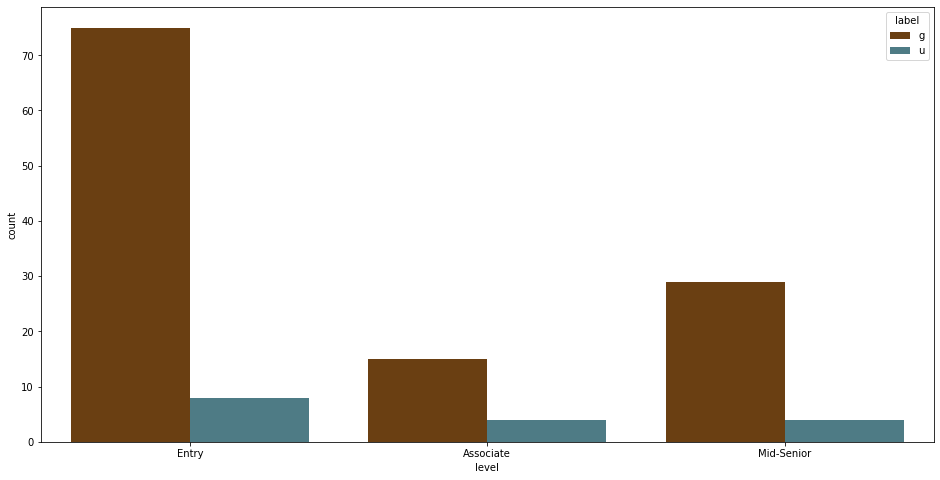

In [21]:
plt.figure(figsize = (16,8))
sns.countplot(x='level', hue='label', data=train, palette= ['#783f04','#45818e'])

#### Statical Testing - Chi$^2$ ($\chi^2$) Test
- $H_0$ Job level is independent on candidates education distribution
- $H_a$ Job level is dependent on candidates education distribution

In [22]:
# Creating contingency table
observed = pd.crosstab(train.level, train.label)
observed

label,g,u
level,,
Associate,15,4
Entry,75,8
Mid-Senior,29,4


In [23]:
# Set alpha
alpha = 0.05
# Conduct chi^2 test
chi2, p, dof, expected = stats.chi2_contingency(observed)
# Conclude hypothesis
if p < alpha:
    print("We reject the hypothesis that job level is independent on candidates education distribution")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


***

## Requirements vs. Degree

In [24]:
all_text = ' '.join(train.requirements)
u_text = ' '.join(train[train.label == 'u'].requirements)
g_text = ' '.join(train[train.label == 'g'].requirements)
all_text = clean(all_text)
u_text = clean(u_text)
g_text = clean(g_text)

In [25]:
pd.Series(all_text.split()).value_counts().head(20)

data           574
year           201
science        164
business       144
analytics      141
degree         135
python         119
sql            114
working        111
strong         105
team            95
learning        91
analysis        89
work            88
engineering     88
statistic       86
knowledge       85
solution        81
tool            79
field           76
dtype: int64

In [26]:
all_freq = pd.Series(all_text.split()).value_counts()
u_freq = pd.Series(u_text.split()).value_counts()
g_freq = pd.Series(g_text.split()).value_counts()

In [27]:
word_counts = pd.concat([all_freq, u_freq, g_freq], sort=True, axis=1)
word_counts.columns = ['all', 'u', 'g']
word_counts = word_counts.fillna(0).apply(lambda s: s.astype(int))

In [28]:
word_counts.sort_values(by='all', ascending=False)

,all,u,g
data,574,100,474
year,201,40,161
science,164,22,142
business,144,19,125
analytics,141,15,126
...,...,...,...
ignition,1,0,1
identified,1,1,0
hundred,1,0,1
humanity,1,0,1


In [29]:
word_counts.assign(p_u=word_counts.u / word_counts['all'],p_g=word_counts.g / word_counts['all'])

,all,u,g,p_u,p_g
01,1,0,1,0.000000,1.000000
02,1,0,1,0.000000,1.000000
1,22,10,12,0.454545,0.545455
10,3,0,3,0.000000,1.000000
100,2,0,2,0.000000,1.000000
...,...,...,...,...,...
york,1,0,1,0.000000,1.000000
youll,3,0,3,0.000000,1.000000
youre,1,0,1,0.000000,1.000000
youve,2,0,2,0.000000,1.000000


<AxesSubplot:>

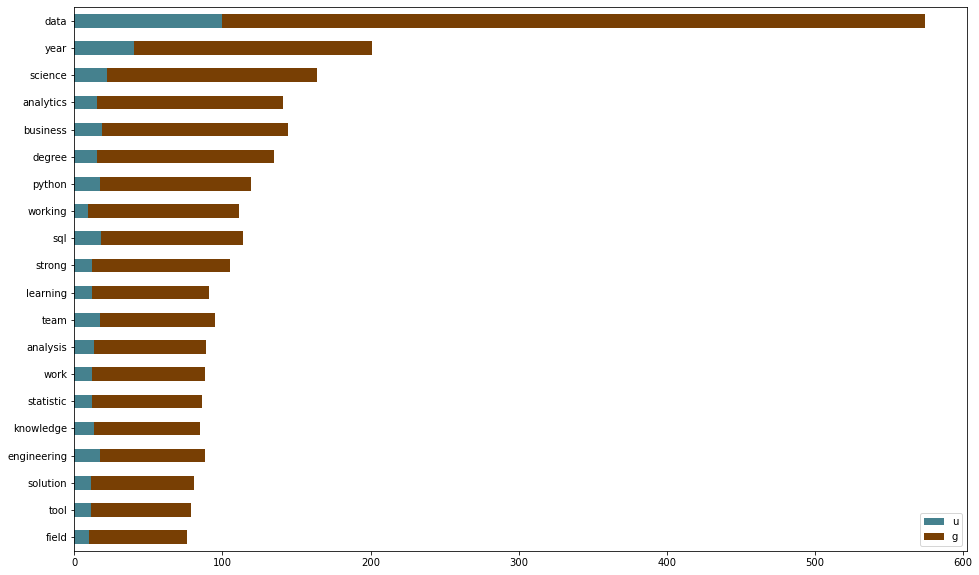

In [30]:
word_counts.assign(p_u=word_counts.u / word_counts['all'],p_g=word_counts.g / word_counts['all'])\
    .sort_values(by='all')\
    .tail(20)\
    [['u', 'g']]\
    .sort_values(by='g')\
    .plot.barh(stacked=True, figsize = (16,10), color = ['#45818e', '#783f04'])

In [31]:
word_counts[(word_counts.u > 10) & (word_counts.g > 10)]\
    .assign(ratio=lambda df: df.u/df.g)\
    .sort_values(by='ratio')

,all,u,g,ratio
analytics,141,15,126,0.119048
degree,135,15,120,0.125000
strong,105,12,93,0.129032
learning,91,12,79,0.151899
business,144,19,125,0.152000
science,164,22,142,0.154930
solution,81,11,70,0.157143
work,88,12,76,0.157895
tool,79,11,68,0.161765
statistic,86,12,74,0.162162


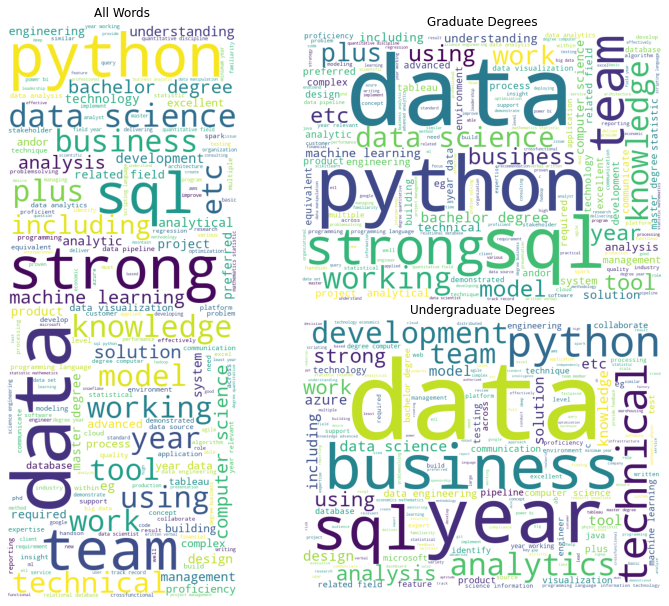

In [32]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(all_text)
g_cloud = WordCloud(background_color='white', height=600, width=800).generate(g_text)
u_cloud = WordCloud(background_color='white', height=600, width=800).generate(u_text)

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(g_cloud)
axs[2].imshow(u_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Graduate Degrees')
axs[2].set_title('Undergraduate Degrees')

for ax in axs: ax.axis('off')

### Bigrams

In [33]:
pd.Series(nltk.ngrams(all_text.split(), 2)).value_counts().head(20)

(data, science)            83
(machine, learning)        60
(computer, science)        58
(2, year)                  48
(bachelor, degree)         42
(3, year)                  37
(related, field)           35
(year, data)               32
(data, visualization)      30
(programming, language)    29
(data, analytics)          28
(5, year)                  28
(python, r)                27
(master, degree)           26
(data, pipeline)           25
(data, analysis)           23
(1, year)                  22
(data, engineering)        21
(year, relevant)           21
(data, source)             21
dtype: int64

#### Graduate Degrees

In [34]:
top_20_g_bigrams = (pd.Series(nltk.ngrams(g_text.split(), 2))
                      .value_counts()
                      .head(20))

top_20_g_bigrams.head()

(data, science)        71
(machine, learning)    52
(computer, science)    50
(2, year)              42
(bachelor, degree)     39
dtype: int64

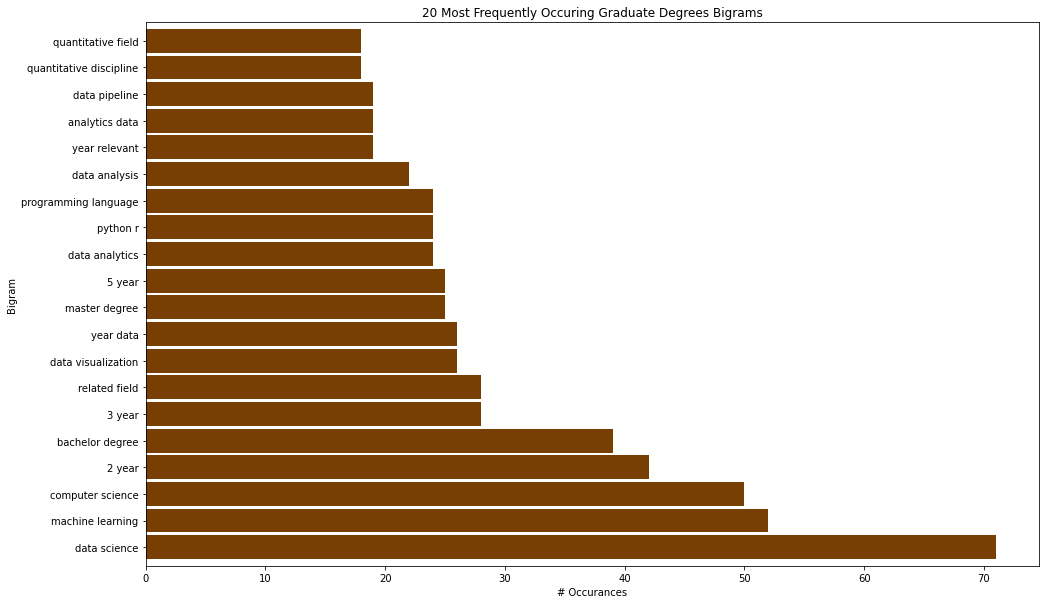

In [35]:
top_20_g_bigrams.sort_values(ascending=False).plot.barh(color='#783f04', width=.9, figsize=(16, 10))

plt.title('20 Most Frequently Occuring Graduate Degrees Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_g_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

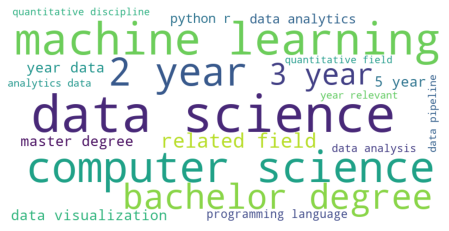

In [36]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_g_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

#### Undergraduate Degrees

In [37]:
top_20_u_bigrams = (pd.Series(nltk.ngrams(u_text.split(), 2))
                      .value_counts()
                      .head(20))

top_20_u_bigrams.head()

(data, science)        12
(data, engineering)    10
(1, year)              10
(3, year)               9
(computer, science)     8
dtype: int64

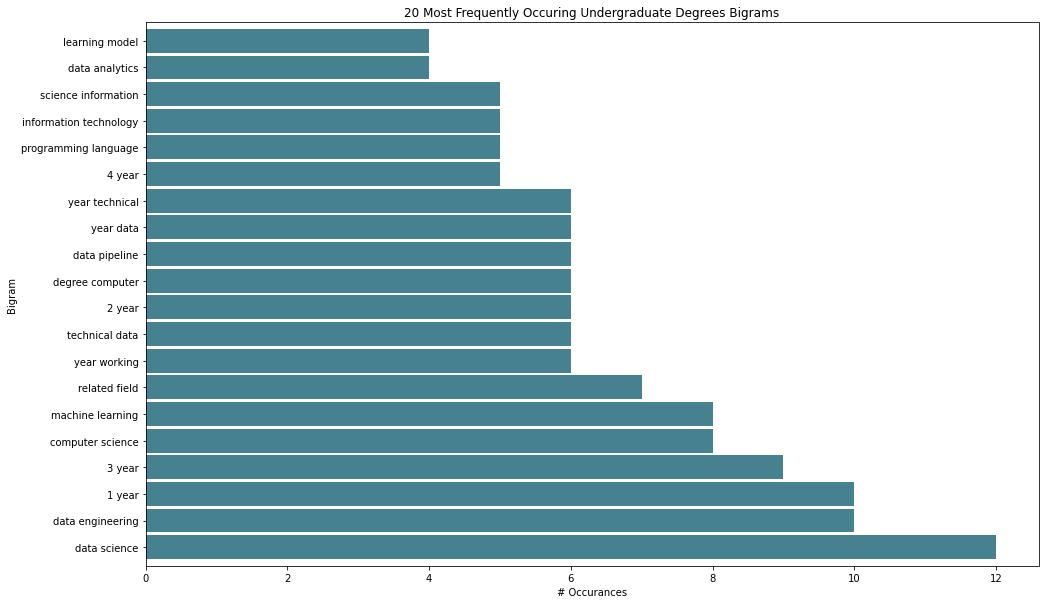

In [38]:
top_20_u_bigrams.sort_values(ascending=False).plot.barh(color='#45818e', width=.9, figsize=(16, 10))

plt.title('20 Most Frequently Occuring Undergraduate Degrees Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_u_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

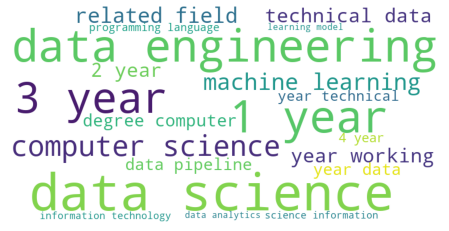

In [39]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_u_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

***

## Skills vs. Degree

In [40]:
# Separating skills into 3 Series: all, b, h
all_skills = ' '.join(train.skills)
u_skills = ' '.join(train[train.label == 'u'].skills)
g_skills = ' '.join(train[train.label == 'g'].skills)
all_skills = clean(all_skills)
u_skills = clean_skills(u_skills)
g_skills = clean_skills(g_skills)

In [41]:
pd.Series(all_skills.split()).value_counts().head(20)

data          129
sql           126
microsoft     117
python         77
c              67
learning       67
machine        60
analysis       47
r              45
leadership     41
tableau        34
excel          31
java           29
analytics      29
modeling       25
management     25
javascript     24
powerpoint     24
server         23
database       21
dtype: int64

In [42]:
all_skills_freq = pd.Series(all_skills.split()).value_counts()
u_skills_freq = pd.Series(u_skills.split()).value_counts()
g_skills_freq = pd.Series(g_skills.split()).value_counts()

In [43]:
skill_counts = pd.concat([all_skills_freq, u_skills_freq, g_skills_freq], sort=True, axis=1)
skill_counts.columns = ['all', 'u', 'g']
skill_counts = skill_counts.fillna(0).apply(lambda s: s.astype(int))

In [44]:
skill_counts.sort_values(by='all', ascending=False)

,all,u,g
data,129,23,106
sql,126,17,109
microsoft,117,11,106
python,77,11,66
c,67,5,62
...,...,...,...
jupyter,1,0,1
kafka,1,1,0
lake,1,1,0
lambda,1,1,0


<AxesSubplot:>

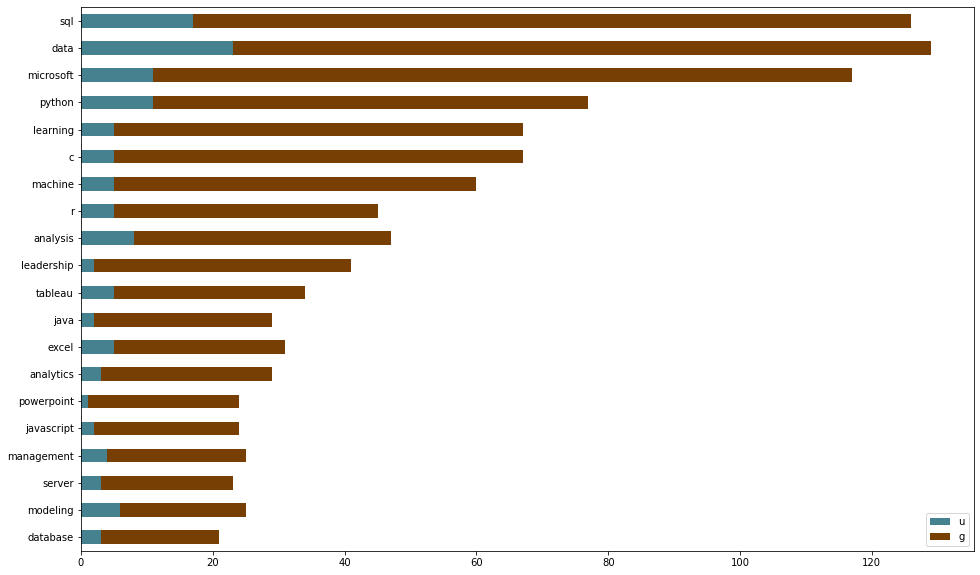

In [57]:
skill_counts.assign(p_u=skill_counts.u / skill_counts['all'],p_g=skill_counts.g / skill_counts['all'])\
    .sort_values(by='all')\
    .tail(20)\
    [['u', 'g']]\
    .sort_values(by='g')\
    .plot.barh(stacked=True, figsize = (16,10), color = ['#45818e', '#783f04'])

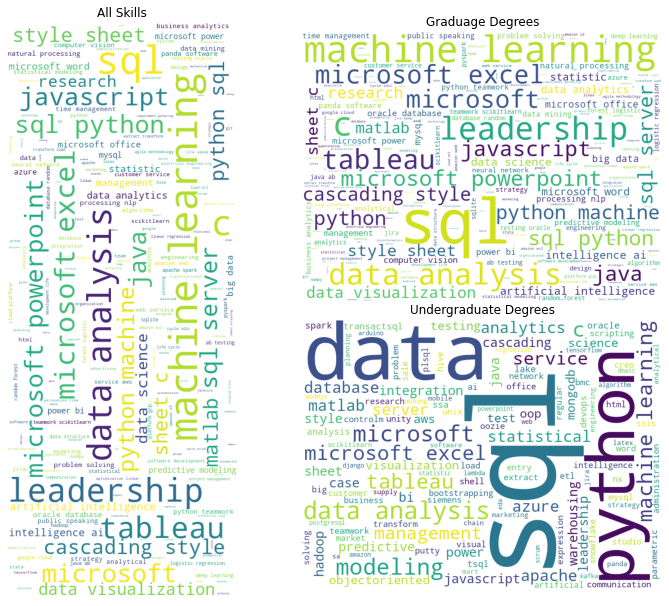

In [46]:
all_skills_cloud = WordCloud(background_color='white', height=1000, width=400).generate(all_skills)
g_skills_cloud = WordCloud(background_color='white', height=600, width=800).generate(g_skills)
u_skills_cloud = WordCloud(background_color='white', height=600, width=800).generate(u_skills)

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_skills_cloud)
axs[1].imshow(g_skills_cloud)
axs[2].imshow(u_skills_cloud)

axs[0].set_title('All Skills')
axs[1].set_title('Graduage Degrees')
axs[2].set_title('Undergraduate Degrees')

for ax in axs: ax.axis('off')

### Bigrams

In [47]:
pd.Series(nltk.ngrams(all_skills.split(), 2)).value_counts().head(20)

(machine, learning)           60
(data, analysis)              42
(microsoft, excel)            30
(sql, python)                 24
(microsoft, powerpoint)       24
(sql, server)                 22
(python, machine)             20
(sheet, c)                    20
(style, sheet)                20
(cascading, style)            20
(python, sql)                 20
(data, visualization)         19
(microsoft, sql)              18
(data, science)               17
(intelligence, ai)            16
(artificial, intelligence)    16
(data, analytics)             15
(microsoft, word)             15
(sql, microsoft)              13
(microsoft, office)           12
dtype: int64

#### Higher Education

In [48]:
top_20_g_skill_bigrams = (pd.Series(nltk.ngrams(g_skills.split(), 2))
                      .value_counts()
                      .head(20))

top_20_g_skill_bigrams.head()

(machine, learning)        55
(data, analysis)           35
(microsoft, excel)         25
(microsoft, powerpoint)    23
(sql, python)              21
dtype: int64

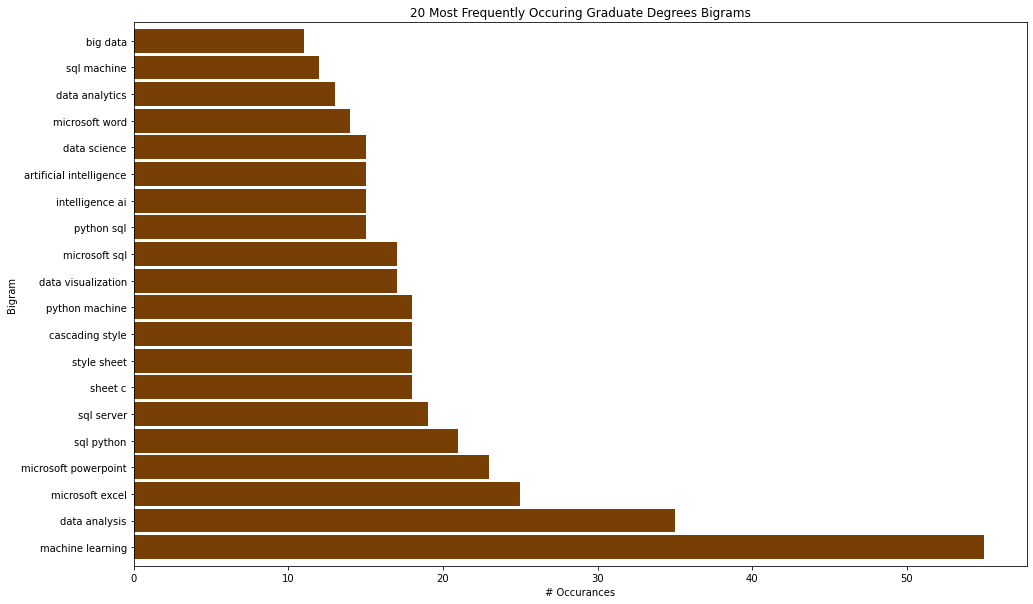

In [49]:
top_20_g_skill_bigrams.sort_values(ascending=False).plot.barh(color='#783f04', width=.9, figsize=(16, 10))

plt.title('20 Most Frequently Occuring Graduate Degrees Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_g_skill_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

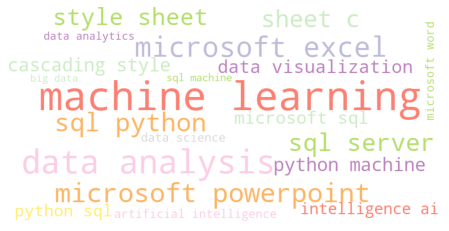

In [50]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_g_skill_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400, colormap='Set3').generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

#### Bachelor

In [51]:
top_20_u_skill_bigrams = (pd.Series(nltk.ngrams(u_skills.split(), 2))
                      .value_counts()
                      .head(20))

top_20_u_skill_bigrams.head()

(data, analysis)       7
(python, sql)          5
(machine, learning)    5
(microsoft, excel)     5
(sql, server)          3
dtype: int64

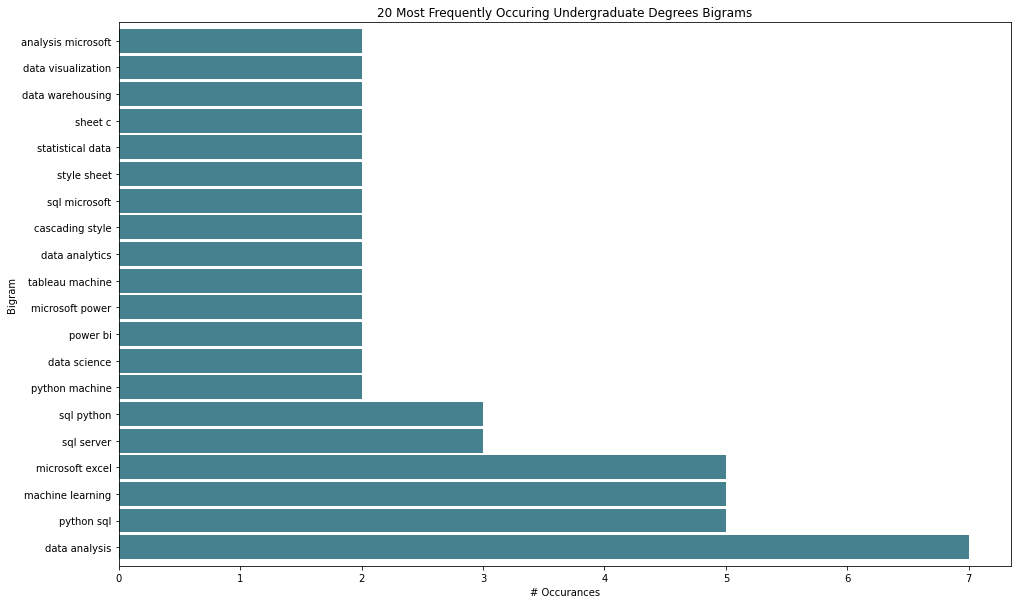

In [52]:
top_20_u_skill_bigrams.sort_values(ascending=False).plot.barh(color='#45818e', width=.9, figsize=(16, 10))

plt.title('20 Most Frequently Occuring Undergraduate Degrees Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_u_skill_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

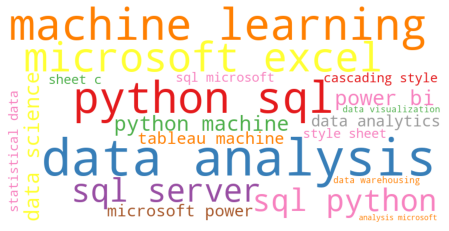

In [53]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_u_skill_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400,  colormap='Set1').generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [54]:
train.label.value_counts()

g    119
u     16
Name: label, dtype: int64